In [152]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats  as sci

In [153]:
url = 'https://github.com/Andres-Fonseca/data_sets/raw/main/DatosTrabajo2EAE20242.csv'
datos_empresas=pd.read_csv(url,delimiter=';', encoding='ISO-8859-1')

PREGUNTA 1

In [154]:
# nivel de significancia α=0.05
# numero de datos = 200

In [155]:
# promedio de inversion 
mean= np.mean(datos_empresas['Inversión en marketing digital'])
# desviacion estandar muestral
desviacion_estandar = np.std(datos_empresas['Inversión en marketing digital'], ddof=1)
# tamaño de la muestra
n= len(datos_empresas['Inversión en marketing digital'])
# error estandar
SE= desviacion_estandar/ np.sqrt(n)
# t critico 
t_critical = sci.t.ppf(1 - 0.05 / 2, df=n - 1)
# margen de erro
margin_of_error = t_critical * SE
# Calcular el intervalo de confianza
confidence_interval = (mean - margin_of_error, mean + margin_of_error)

In [156]:
print(f'con un nivel de confianza del 95%\
,la inversión promedio en marketing digital es superior a 4 millones de pesos.\n intervalos {confidence_interval} ')

con un nivel de confianza del 95%,la inversión promedio en marketing digital es superior a 4 millones de pesos.
 intervalos (np.float64(4277535.141309839), np.float64(4641205.39869016)) 


PREGUNTA 2 

h0= uventas−uinversion ≤2,000,000

ha= uventas−uinversion >2,000,000

In [157]:
# nivel de significancia α=0.06

### tipo de distribucion 

In [158]:
# se calcula si la distribucion de los datos es normal tanto para la inversion como ventas
# esto con el fin de verificar que tipo de estadistico se debe utilizar para la prueba de hipotesis


# prueba de Shapiro-Wilk inversion 
stat_, p_value_ = sci.shapiro(datos_empresas['Inversión en marketing digital'])
print('La distribucion de los datos de inversion es normal' \
      if  p_value_>0.05 else 'La distribucion de los datos de inversion no es normal')

# prueba de Shapiro-Wilk venta
stat, p_value = sci.shapiro(datos_empresas['Venta'])
print('La distribucion de los datos de venta es normal' \
      if  p_value>0.05 else 'La distribucion de los datos de venta no es normal')

La distribucion de los datos de inversion no es normal
La distribucion de los datos de venta no es normal


se grafica las distribuciones

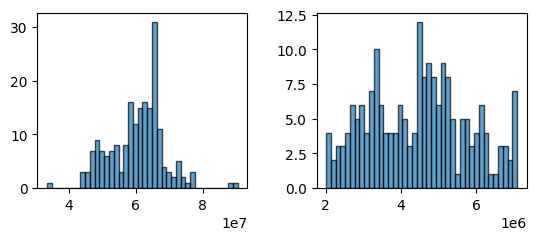

In [159]:
fig , ax = plt.subplots(1,2 , figsize=(6,3))
ax[0].hist(datos_empresas['Venta'], bins=40, edgecolor='k', alpha=0.7)
ax[1].hist(datos_empresas['Inversión en marketing digital'], bins=40, edgecolor='k', alpha=0.7)

plt.tight_layout(pad=3.0)
plt.show()

DATOS 

In [160]:
# media de ventas
mean_ventas= np.mean(datos_empresas['Venta'])
# media de inversion
mean_inve= np.mean(datos_empresas['Inversión en marketing digital'])
# delta 
delta = 2000000
# varianza
varianza_i= np.var(datos_empresas['Inversión en marketing digital'], ddof=1)
varianza_v=np.var(datos_empresas['Venta'], ddof=1)
# tamaño de la muestra
n1=n
n2=n

Calculo del estadistico de prueba

In [161]:
numerador= (mean_ventas - mean_inve) - delta
denominador= np.sqrt((varianza_i/n1) + (varianza_v/n2))
z = numerador/denominador

In [162]:
z_alpha = sci.norm.ppf(1 - 0.06)

In [163]:
if z > z_alpha:
    print("Se rechaza la hipótesis nula H0.")
else:
    print("No se rechaza la hipótesis nula H0.")

Se rechaza la hipótesis nula H0.
